# Berkeley Application

Julio César Guzmán Villanueva

### 1

`Escribe un python script que lea los archivos con los documentos adjuntos en el folder “datosdemanda.zip” y convierte de json a pandas dataframe cada archivo. Las columnas en el dataframe deberían de ser “hora”, “valorDemanda”, “valorPronostico”, y “valorGeneracion”. NOTA: El formato de los nombres de cada archivo en el .zip folder corresponde a la nomenclatura día/mes/año.`

### Función para extraer zip file

In [87]:
import zipfile

def extractZipFile(zipFileName):
    archive = zipfile.ZipFile(zipFileName)
    for file in archive.namelist():
        archive.extract(file)

### Función para obtener el nombre de todos los archivos en un directorio

In [88]:
from os import listdir
from os.path import isfile, join

def filesInDirectory(directoryName):
    return [f for f in listdir(directoryName) if isfile(join(directoryName, f))]

### Función para deplegar una lista de data frames

In [89]:
from IPython.display import display

def displayDataFrames(dataFrames):
    for dataFrame in dataFrames:
        display(dataFrame)

### Importar pandas para su uso posterior

In [90]:
import pandas

### Funcion para obtener un pandas dataframe a partir de un archivo 

In [91]:
def dataframeFromFileWithPath(path):
    openFile = open(path, 'r')
    fileContent = openFile.read()
    dataframe = pandas.read_json(path_or_buf = fileContent)
    return dataframe

### Función para obtener el timestamp 

In [92]:
def timeStamp(year = '', month = '', day = '', hour = ''):
    dateString = "{}-{}-{} {}:00".format(day, month, year, hour)
    return dateString

### Función para obtener los dataframes de un directorio

**Supuestos:**
- La columna "valorEnlace" no aporta valor 
- El nombre del pais no aporta valor
- El timestamp representa al periodo desde que se menciona en el stamp hasta una hora despues

In [93]:
def dataframesFromDirectory(directory):
    dataframesFromDirectory = []
    for file in filesInDirectory(directory):
        fileRelativePath = join(directory, file)
        dataframe = dataframeFromFileWithPath(fileRelativePath)
        tokensInFileName = file.split('.')
        day = tokensInFileName[0]
        month = tokensInFileName[1]
        year = tokensInFileName[2]
        country = tokensInFileName[3]
        
        timeList = []
        for currentIndex in range(len(dataframe.index)):
            timeIndex = timeStamp(year = year, month = month, day = day, hour = str(dataframe.hora[currentIndex] - 1 % 24) )
            timeList.append(timeIndex)
        dataframe.index = pandas.Series(timeList)
        
        # Clean unused columns
        dataframe = dataframe.drop('valorEnlace', 1)
        dataframe = dataframe.drop('hora', 1)
        
        dataframesFromDirectory.append(dataframe)
    return dataframesFromDirectory

### Función para extraer datos de archivo zip y ponerlos en un dataframe

In [94]:
def allData():
    dataFileName = "datosdemanda"
    dataZipFileName = dataFileName + ".zip"
    extractZipFile(dataZipFileName)
    dataDirectoryName = dataFileName
    dataframes = dataframesFromDirectory(dataDirectoryName)
    allData = pandas.concat(dataframes)
    
    #Turn data frame into a numeric one
    allData = allData.apply(pandas.to_numeric, errors='coerce')
    
    #Turn index into date time
    allData.index = allData.index.to_datetime()
    
    return allData

### 2
```
Crea un pandas dataframe único para todos los datos capturados en el dataframe. Muestra tu(s) línea(s) de código. Dale el nombre de “all_data_sin” a este dataframe.
```


In [95]:
all_data_sin = allData()
display(all_data_sin)

,valorDemanda,valorGeneracion,valorPronostico
2016-01-05 00:00:00,33932.0,34007.0,35405
2016-01-05 01:00:00,32608.0,32686.0,35405
2016-01-05 02:00:00,31620.0,31688.0,35405
2016-01-05 03:00:00,30633.0,30712.0,35405
2016-01-05 04:00:00,30448.0,30529.0,35405
2016-01-05 05:00:00,30291.0,30376.0,35405
2016-01-05 06:00:00,30783.0,30859.0,35405
2016-01-05 07:00:00,30777.0,30860.0,35405
2016-01-05 08:00:00,31696.0,31779.0,35405
2016-01-05 09:00:00,32959.0,33042.0,35405


### 3
```
Ahora, algunas estadísticas descriptivas de los datos que tienes en el dataframe:

a.     Como varia la demanda durante la semana?

b.     Cuales son las horas pico?

c.     Cuales son los días pico?

d.     Cual es la relación entre el pronostico y la demanda? Entre la demanda y la generación?

```

### Agregar modulo de graficación

In [96]:
%matplotlib inline
import matplotlib.pyplot 

### 3.a Variación de la demanda durante la semana

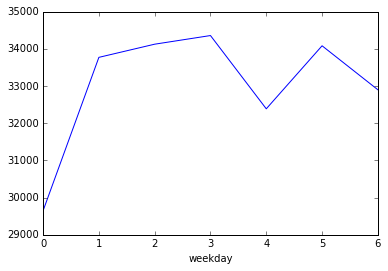

In [97]:
def main():
    data = allData()
    data['weekday'] = data.index.weekday
    data.groupby('weekday')['valorDemanda'].mean().plot()
    
    
if __name__ == "__main__":
    main()

### 3.b Horas pico de la demanda

Al auxiliarnos del gráfico y la siguiente tabla podemos apreciar que las horas pico en el timestamp son a las 21 y 16 hrs. Pero debido al ajuste que realicé para poder utilizar el timestamp **las horas pico son los periodos que ocurren entre las 21 a las 22 horas y  de 16 a 17 hrs.**

,valorDemanda,valorGeneracion,valorPronostico
hour,,,
21,35988.580645,36038.741935,35584.741935
20,35575.064516,35627.387097,35354.741935
16,35570.354839,35631.225806,35208.193548
15,35500.645161,35562.451613,35215.774194
14,35393.774194,35592.129032,35138.000000
22,35372.612903,35414.290323,35200.903226
13,35303.645161,35475.032258,35055.806452
17,35197.451613,35253.000000,35000.258065
12,35060.000000,35127.000000,34932.548387


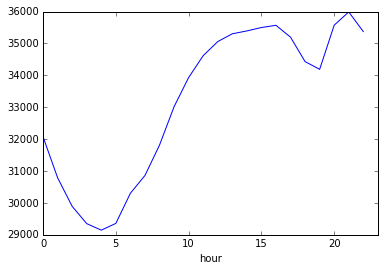

In [98]:
def main():
    data = allData()
    data['hour'] = data.index.hour
    display(data.groupby('hour').mean().sort_values('valorDemanda', ascending = False))
    data.groupby('hour')['valorDemanda'].mean().plot()
    
if __name__ == "__main__":
    main()

### 3.c Dias pico

Por a la gráfica del punto 3.a, donde el 0 representa a el lunes. Sabemos que los dias pico de la semana son los **jueves** y los **sábados** 

### 3.d Correlación de Pearson

In [99]:
def main():
    data = allData()
    print(data.corr(method='pearson'))
    
if __name__ == "__main__":
    main()



                 valorDemanda  valorGeneracion  valorPronostico
valorDemanda         1.000000         0.997834         0.717336
valorGeneracion      0.997834         1.000000         0.717591
valorPronostico      0.717336         0.717591         1.000000


### 4
```
Genera 5 gráficos que describan y visualicen los datos. Pueden ser los que tu quieras (scatter, line, box plots, etc.) para describir la variabilidad y estructura de los datos. Puedes ser tan original como quieras!

```

### Demanda

Cuando graficamos la demanda podemos apreciar que los datos no son completos y en abril encontramos una mayor densidad de datos lo cual tiene un efecto sobre los resultados de las horas y los dias pico ya que estos tenderán a ser más como los de los dato del mes mayo. Para ajustar el resultado se podria normalizar el numero de muestras por mes y luego hacer el promedio.

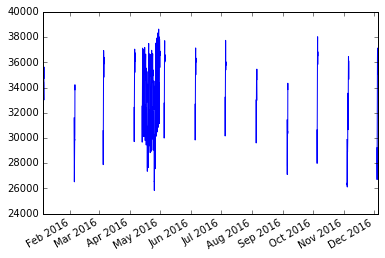

In [100]:
def main():
    data = allData()
    data['valorDemanda'].plot()
    
if __name__ == "__main__":
    main()

### Generación

En la grafica de la generación de energia nos encontramos con el mismo artefacto de densidad que se podría tratar de misma manera que el anterior. Tambien en el mes de marzo tenemos un maximo interesante. Para un analisis posterior en el que se tenga más volumen de datos se podrían tomar muestras de maximos y minimos para poder decir si ese máximo es en realidad una anomalía, o un error de medición. 

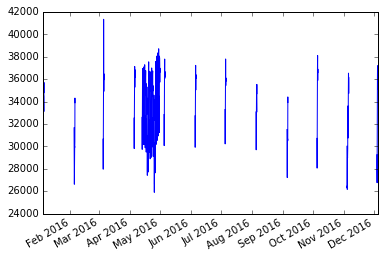

In [101]:
def main():
    data = allData()
    data['valorGeneracion'].plot()
    
if __name__ == "__main__":
    main()

### Pronóstico

En la gráfica del pronóstico podemos encontrar el artefacto causado por la densidad de muestreo. El cual es interesante en esta gráfica por que aparenta que existe una relación que puede que pero no necesariamente este ligada a una causalidad entre la densidad de muestras de demanda y/o generación de energia y la variación en el pronostico. Tambien podría estar siendo afectada por otros factores que no forman parte de este sistema debido a las variaciones al final de la gráfica.

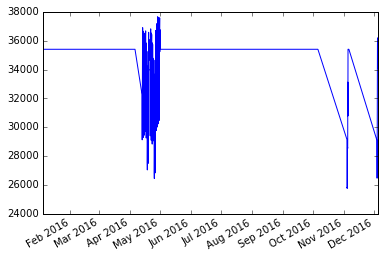

In [102]:
def main():
    data = allData()
    data['valorPronostico'].plot()
    
if __name__ == "__main__":
    main()

### Demanda vs. Generación

La correlación de Pearson que existe entre la demanda y la generación es 0.997834. Esto no implica causalidad entre las dos variables. Tambien podemos ver dos puntos que se separan de la recta que relaciona a la demanda y la generación. Que podría implicar que hubo una gran demanda pero no fue abastecida, errores de medición, o falta de veracidad en los datos en cierta proporción.

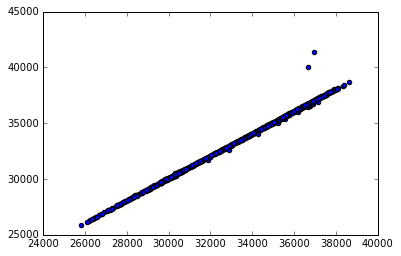

In [103]:
def main():
    data = allData()
    matplotlib.pyplot.scatter(data['valorDemanda'], data['valorGeneracion'])
    matplotlib.pyplot.show()
    
if __name__ == "__main__":
    main()

### Pronóstico vs. Generación

El modelo de pronóstico presenta algunos artefactos los cuales podrían ser causados por alguna clase de entrenamiento. Como acción se podría corregir el modelo de predicción. Para esta gráfica asumo que el pronóstico se realiza en la generación pero tambien podría ser la demanda. Despues de todo nada me garantiza la veracidad de los datos ni de los nombres de las columnas. 

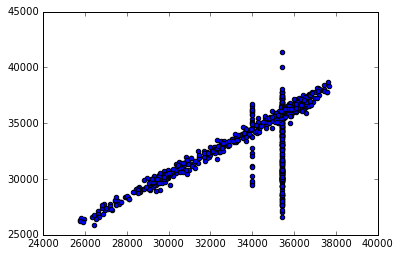

In [104]:
def main():
    data = allData()
    matplotlib.pyplot.scatter(data['valorPronostico'], data['valorGeneracion'])
    matplotlib.pyplot.show()
    
if __name__ == "__main__":
    main()

### 5
```
Muchas veces encontramos información limitada y tenemos que asumir diferentes supuestos. Los datos que has visualizado corresponden a la demanda/generación eléctrica en una región de México para unas fechas muy especificas.

a.     Los datos que estas observando son representativas de toda la republica Mexicana. Ahora imagínate que quisiéramos desagregar estos datos a estados o ciudades. Que supuestos harías para poder desagregar estos datos? Que datos y análisis necesitarías recolectar y desarrollar para llevar esto acabo?

```
**Para desagregar estos datos recolectaria datos de uso de aplicaciones moviles relacionados con su ubicación y estilo de vida (via Google Analytics). Podría hacer supuestos como: De 9AM a 6PM los usuarios con cierto perfil tienden a aglomerarse para trabajar en una zona y que en las horas aledañas utilizan sus telefonos en sus hogares que comprenden otras zonas. Entonces podria utilizar esos datos para dividir a las personas que por ejemplo trabajan en la ciudad pero viven en una provincia y saber hacia que zonas del país canalizar la energia en función del tiempo. Esta idea tambien tiene aplicaciones a celdas celulares ya que se despericia una gran cantidad de energia al surtir de cobertura no necesaria a zonas de baja demanda.**

```
b.     Que datos utilizarías para generar una proyección de los time series en tu dataframe para otros meses, o el próximo año? Que supuestos harías para llevar este análisis a cabo?

```
**Buscaría datos que cumplan con las 4 V's del Big Data: Veracidad. Volumen. Variedad y Velocidad. En cuanto a los supuestos no me animo a dar una respuesta inmediata sin haber realizado un analisis con datos que cumplan estas propiedades. Asumo que los datos utilizados en este test no son veraces** 

```
c.     Que factores tomarías en cuenta si quisieras hacer proyecciones para 20 o 30 años en el futuro? (Max. 250 palabras)
```
**Lo más importante de un analisis de datos es formular la pregunta. Una vez que tenga la pregunta clara y bien definida entonces me enfocaría en demonstrar que tiene una solución, y que esta sea útil. Por ejemplo: Sí hago una proyección a 20 o 30 años con los datos de este test tendría un error demasiado grande y tal vez conteste la pregunta de hacer una predicción pero no dentro de un rango de error y no sería útil.**


### 6
```
Lamentablemente, mucha información no esta tan accesible como la que hemos proporcionado en este mini-test. Es por eso que te pedimos que busques tres ligas (PDF, Excel, web link, etc.) donde encuentres datos sobre la generación de electricidad por medio de plantas Hidroeléctricas en México. Si no sabias, México tiene plantas generadoras Hidroeléctricas de gran y pequeña escala y nuestro modelo utiliza ambas.
```

http://cuentame.inegi.org.mx/mapas/pdf/nacional/tematicos/generacion_energia.pdf

https://www.iea.org/statistics/statisticssearch/report/?country=Mexico&product=electricityandheat

https://www.wolframalpha.com/input/?i=total+primary+energy+of+Mexico

```
a.     Que tipo de datos pudiste encontrar relacionado al tamaño / localización / generación / operación (etc.) de estas plantas en México?
```
**Datos estructurados y no estructurados**
```
b.     Genera un grafico con los datos que hayas encontrado que te haya parecido interesante.

```
**Realicé este [Gráfico en Wolfram Alpha](https://www.wolframalpha.com/input/?i=total+primary+energy+of+Mexico+vs+India) La energía en México se importa y exporta. Tambien debemos considerar factores economicos y fenomenos naturales que pueden afectar la demanda de energía de diferentes zonas. ¿Porqué sólo nos enfocamos en México?**

### Notas del autor: 

Este análisis pude haberlo realizado con más limpieza en los datos para obtener mayor veracidad al obtener los resultados. Tambien para los valores nulos pude haber hecho regresiones para obtener valores para los campos nulos. Por cuestiones de tiempo no regresé a corregirlos. Gracias por la lectura. Este es mi primer Jupyter notebook 😄 so...

In [105]:
print("Hello Jupyter!")

Hello Jupyter!
